In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar 
import datetime 

In [159]:
data = pd.read_csv(r"/Users/ishakadam/Downloads/UberDataset.csv")
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [160]:
data.isnull().any()

START_DATE    False
END_DATE       True
CATEGORY       True
START          True
STOP           True
MILES         False
PURPOSE        True
dtype: bool

In [161]:
data.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [162]:
data = data.dropna()

In [163]:
data.describe()

,MILES
count,653.000000
mean,11.196325
std,22.986429
min,0.500000
25%,3.200000
50%,6.400000
75%,10.400000
max,310.300000


In [164]:
data.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [165]:
data.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [166]:
# converting date to approprate data type 

data['START_DATE'] = pd.to_datetime(data['START_DATE'], format = 'mixed')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], format = 'mixed')

In [167]:
data.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [168]:
# extracting and adding colums related to data and time that we might reequire

hour = []
day =[]
dayofweek = []
month = []
weekday = []

for x in data['START_DATE']:
    hour.append(x.hour)
    day.append(x.day)
    dayofweek.append(x.dayofweek)
    month.append(x.month)
    weekday.append(calendar.day_name[dayofweek[-1]])

data['HOUR'] = hour
data['DAY']  = day
data['DAY OF WEEK'] = dayofweek
data['MONTH'] = month
data['WEEKDAY'] = weekday



In [169]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday


In [170]:
data['CATEGORY'].value_counts()

CATEGORY
Business    647
Personal      6
Name: count, dtype: int64

<Axes: xlabel='CATEGORY', ylabel='count'>

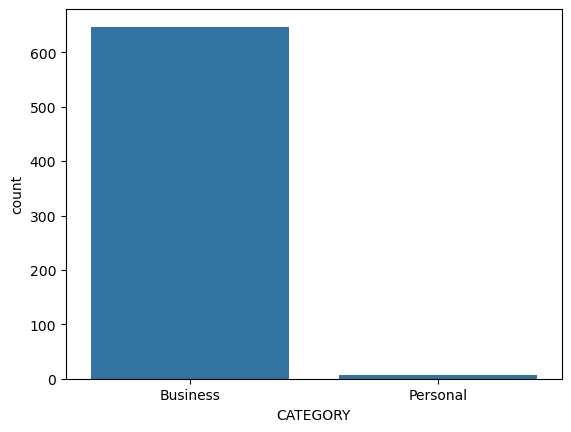

In [171]:
sns.countplot(x = 'CATEGORY', data = data)

<Axes: ylabel='Frequency'>

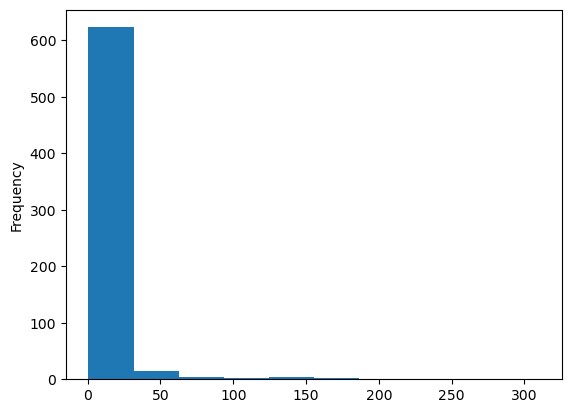

In [172]:
data['MILES'].plot.hist()

In [173]:
hours = data['START_DATE'].dt.hour.value_counts()
hours

START_DATE
13    55
14    52
17    51
15    51
18    51
16    45
20    45
12    43
11    39
19    35
21    34
10    33
9     26
23    21
22    21
8     17
0     13
7      8
1      4
3      3
5      3
6      2
2      1
Name: count, dtype: int64

Text(0, 0.5, 'Frequency')

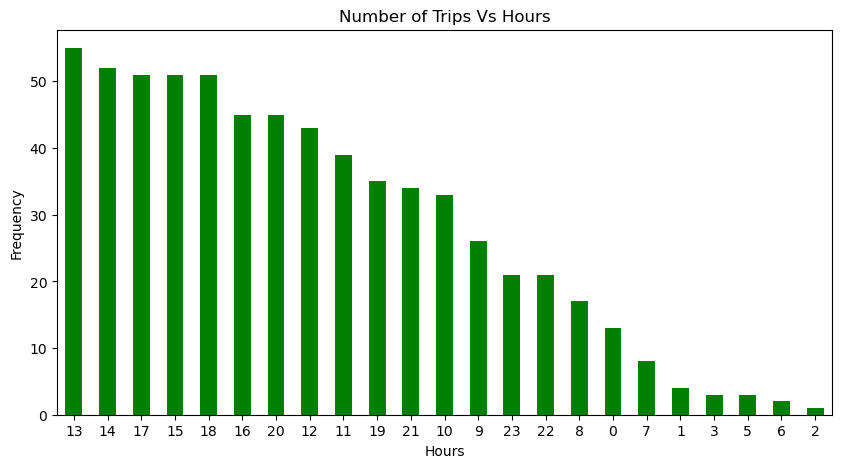

In [174]:
hours.plot(kind = 'bar', color = 'green', figsize = (10,5))

plt.title('Number of Trips Vs Hours')
plt.xlabel('Hours')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')

In [175]:
data['PURPOSE'].value_counts()

PURPOSE
Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: count, dtype: int64

<Axes: xlabel='PURPOSE'>

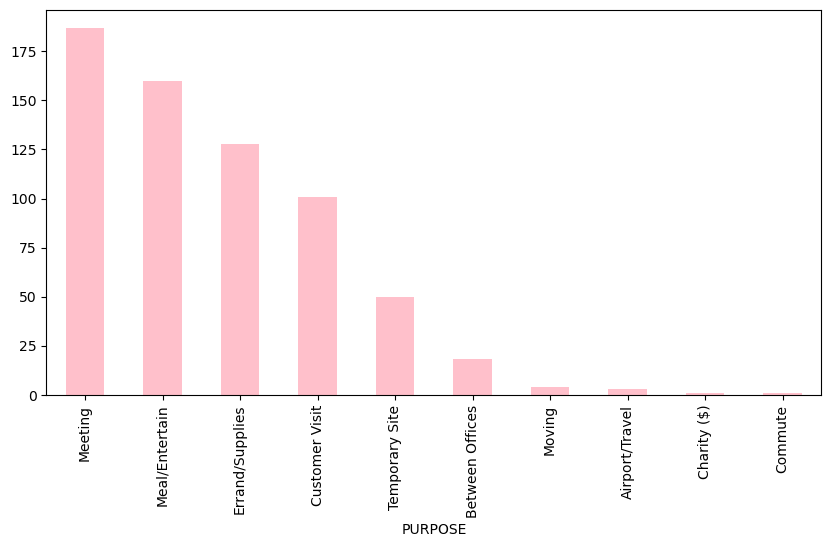

In [176]:
data['PURPOSE'].value_counts().plot(kind = 'bar', figsize = (10, 5), color = 'pink')

In [177]:
data['WEEKDAY'].value_counts()

WEEKDAY
Friday       125
Tuesday       94
Thursday      92
Sunday        87
Monday        87
Wednesday     85
Saturday      83
Name: count, dtype: int64

<Axes: xlabel='WEEKDAY'>

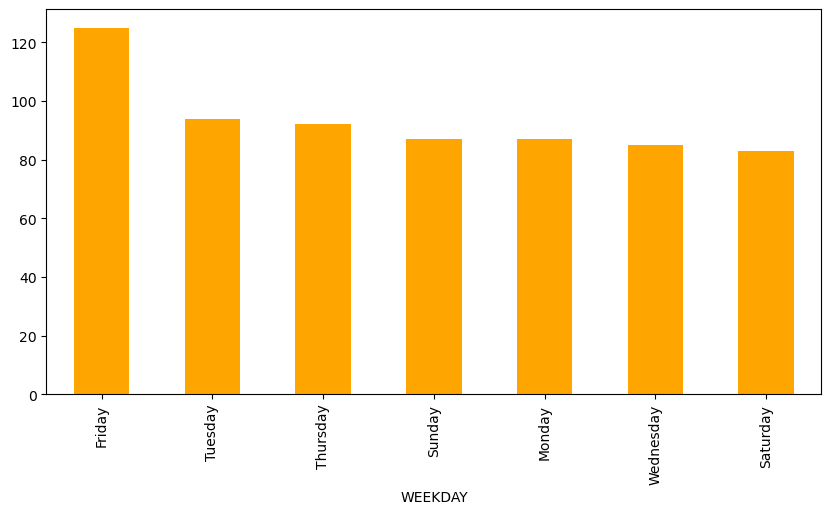

In [178]:
data['WEEKDAY'].value_counts().plot(kind = 'bar', figsize = (10,5), color = 'orange')

<Axes: xlabel='DAY'>

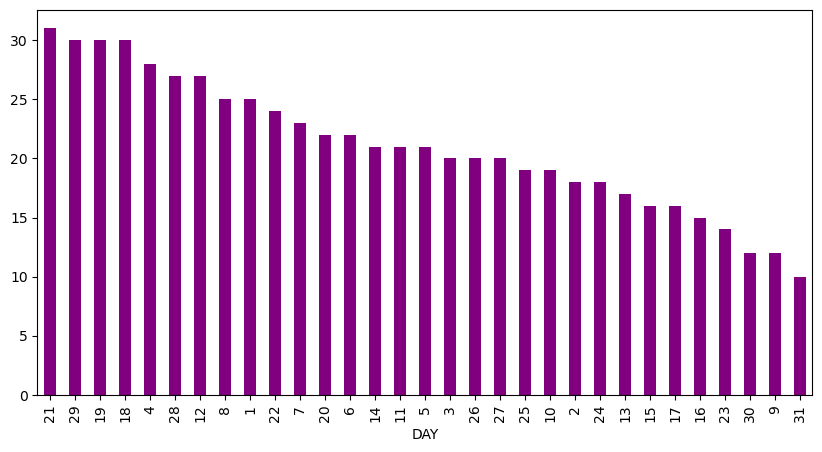

In [179]:
data['DAY'].value_counts().plot(kind = 'bar', figsize =(10, 5), color = 'purple')

# what are the trips in the month?

<Axes: xlabel='MONTH'>

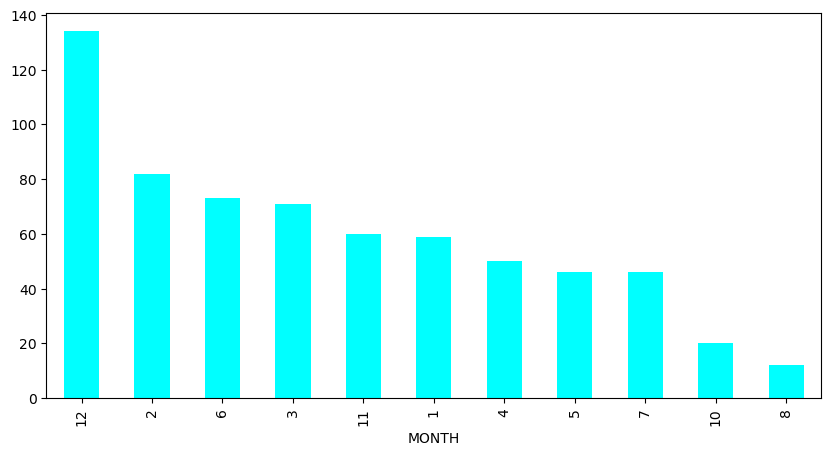

In [181]:
data['MONTH'].value_counts().plot(kind = 'bar', figsize=(10, 5), color = 'aqua')

# The staring points if trips.where do people start boarding their trip from most?

In [183]:
data['START'].value_counts()

START
Cary                161
Unknown Location     55
Morrisville          54
Whitebridge          36
Durham               30
                   ... 
Lower Manhattan       1
Lake Reams            1
Latta                 1
Briar Meadow          1
Gampaha               1
Name: count, Length: 131, dtype: int64

<Axes: xlabel='START'>

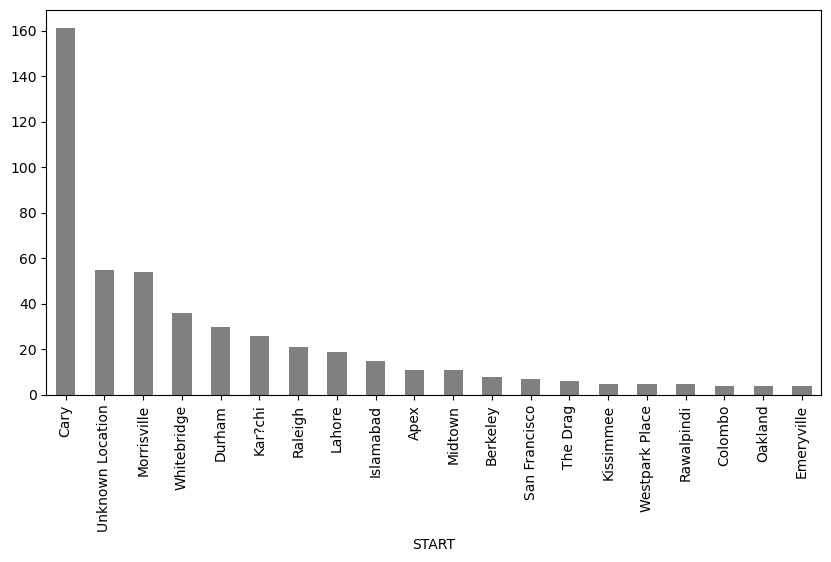

In [184]:
data['START'].value_counts()[:20].plot(kind = 'bar', figsize = (10, 5), color = 'grey')

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 653 entries, 0 to 1154
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   653 non-null    datetime64[ns]
 1   END_DATE     653 non-null    datetime64[ns]
 2   CATEGORY     653 non-null    object        
 3   START        653 non-null    object        
 4   STOP         653 non-null    object        
 5   MILES        653 non-null    float64       
 6   PURPOSE      653 non-null    object        
 7   HOUR         653 non-null    int64         
 8   DAY          653 non-null    int64         
 9   DAY OF WEEK  653 non-null    int64         
 10  MONTH        653 non-null    int64         
 11  WEEKDAY      653 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(4), object(5)
memory usage: 66.3+ KB


# There are a lot of null values in PURPOSE column, so for that we will be filling the null values with a NOT keyword.

In [187]:
data['PURPOSE'].fillna('NULL', inplace=True)

/var/folders/5f/7zhd7rfs0y7fmbnvx_jvx4qh0000gn/T/ipykernel_1210/1739044064.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE'].fillna('NULL', inplace=True)


In [188]:
# Splitting the START_DATE to date and time column and then converting the time into four different categories i.e. Morning, Afternoon, Evening, Night

from datetime import datetime
 
data['date'] = pd.DatetimeIndex(data['START_DATE']).date
data['time'] = pd.DatetimeIndex(data['START_DATE']).hour
 
#changing into categories of day and night
data['day-night'] = pd.cut(x=data['time'],
                              bins = [0,10,15,19,24],
                              labels = ['Morning','Afternoon','Evening','Night'])


In [189]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,2016-01-01,21,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,2016-01-06,17,Evening


In [190]:
data.dropna(inplace=True)

In [191]:
data.drop_duplicates(inplace=True)

In [192]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 1154
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   639 non-null    datetime64[ns]
 1   END_DATE     639 non-null    datetime64[ns]
 2   CATEGORY     639 non-null    object        
 3   START        639 non-null    object        
 4   STOP         639 non-null    object        
 5   MILES        639 non-null    float64       
 6   PURPOSE      639 non-null    object        
 7   HOUR         639 non-null    int64         
 8   DAY          639 non-null    int64         
 9   DAY OF WEEK  639 non-null    int64         
 10  MONTH        639 non-null    int64         
 11  WEEKDAY      639 non-null    object        
 12  date         639 non-null    object        
 13  time         639 non-null    int32         
 14  day-night    639 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(1), int32(1), int6

# data visualization

In [194]:
obj =(data.dtypes =='object')
object_cols = list(obj[obj].index)

unique_values ={}

for col in object_cols:
    unique_values[col] = data[col].unique().size

unique_values

{'CATEGORY': 2,
 'START': 129,
 'STOP': 135,
 'PURPOSE': 10,
 'WEEKDAY': 7,
 'date': 215}

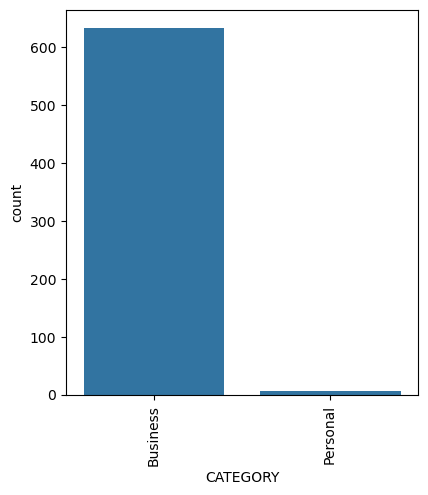

In [195]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(x='CATEGORY',data=data)
plt.xticks(rotation=90)
plt.show()

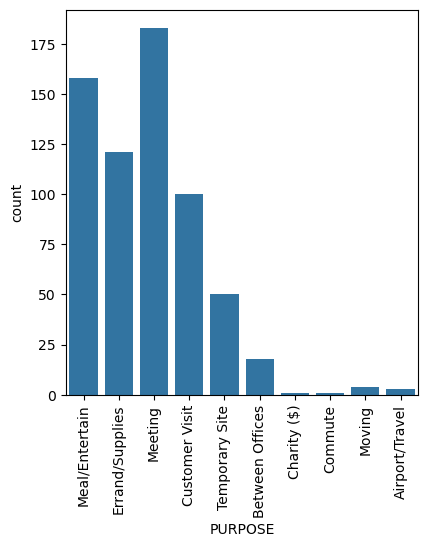

In [196]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.countplot(x='PURPOSE',data=data)
plt.xticks(rotation=90)

plt.show()

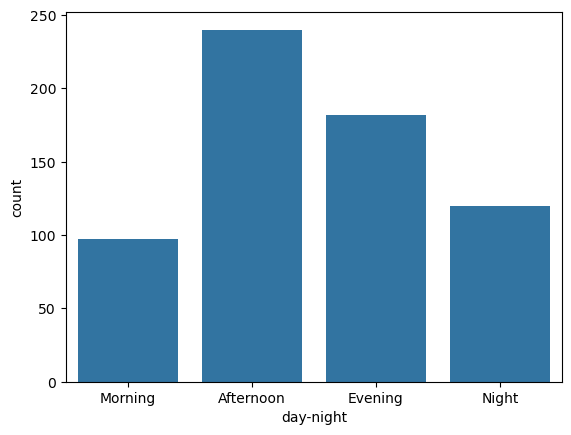

In [197]:
sns.countplot(x='day-night', data=data)
plt.show()

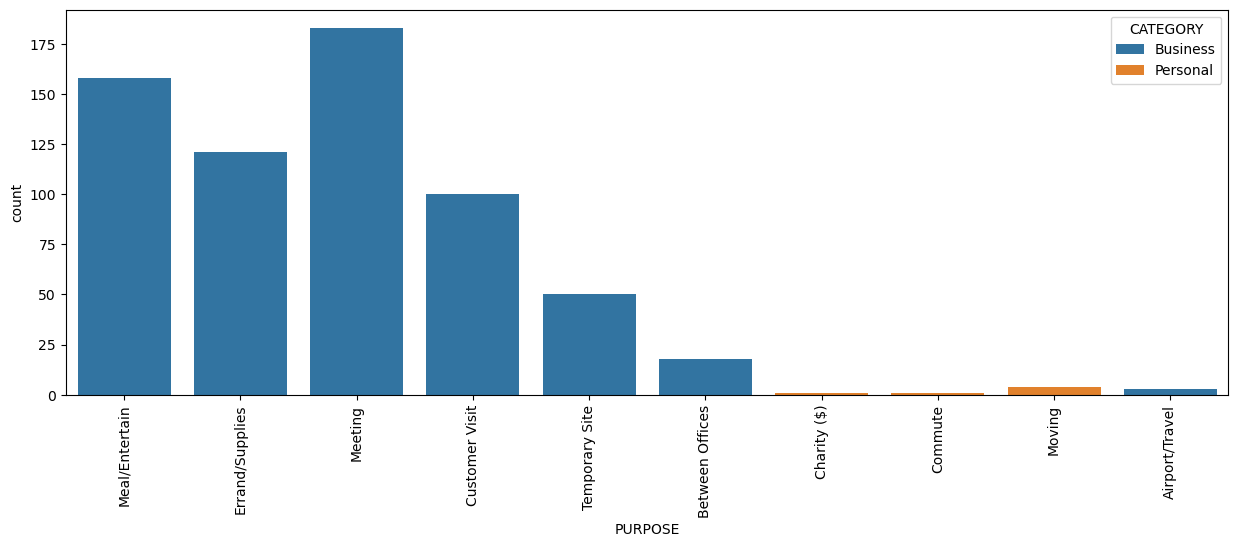

In [198]:
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='PURPOSE', hue='CATEGORY')
plt.xticks(rotation=90)
plt.show()
        

In [199]:
# As we have seen that CATEGORY and PURPOSE columns are two very important columns. 
# So now we will be using OneHotEncoder to categories them.

In [200]:
from sklearn.preprocessing import OneHotEncoder

object_cols = ['CATEGORY', 'PURPOSE']

OH_encoder = OneHotEncoder(sparse_output=False)

OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[object_cols]))
OH_cols.index = data.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = data.drop(object_cols, axis=1)

dataset = pd.concat([df_final, OH_cols], axis=1)

In [201]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,HOUR,DAY,DAY OF WEEK,MONTH,WEEKDAY,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,4,1,Friday,2016-01-01,21,Night
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,5,1,Saturday,2016-01-02,20,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,1,Tuesday,2016-01-05,17,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,2,1,Wednesday,2016-01-06,14,Afternoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,2,1,Wednesday,2016-01-06,17,Evening


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 639 entries, 0 to 1154
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE   639 non-null    datetime64[ns]
 1   END_DATE     639 non-null    datetime64[ns]
 2   CATEGORY     639 non-null    object        
 3   START        639 non-null    object        
 4   STOP         639 non-null    object        
 5   MILES        639 non-null    float64       
 6   PURPOSE      639 non-null    object        
 7   HOUR         639 non-null    int64         
 8   DAY          639 non-null    int64         
 9   DAY OF WEEK  639 non-null    int64         
 10  MONTH        639 non-null    int64         
 11  WEEKDAY      639 non-null    object        
 12  date         639 non-null    object        
 13  time         639 non-null    int32         
 14  day-night    639 non-null    category      
dtypes: category(1), datetime64[ns](2), float64(1), int32(1), int6

<Axes: >

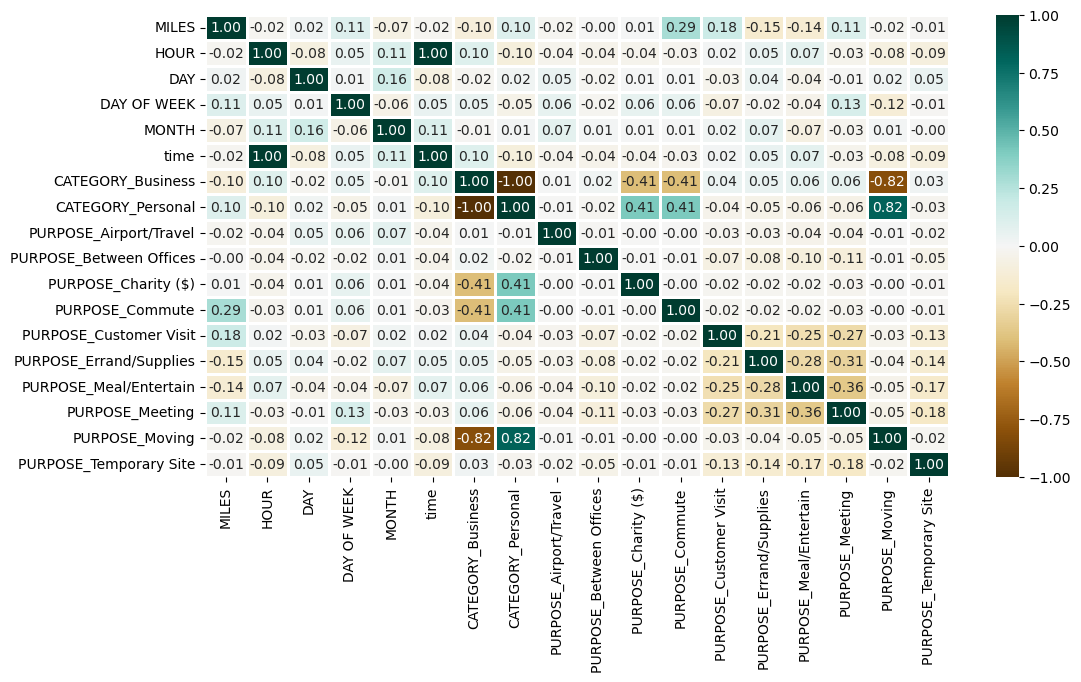

In [203]:
plt.figure(figsize=(12, 6))

corr = dataset.corr(method = 'pearson', numeric_only=True)

sns.heatmap(corr,
            cmap='BrBG', 
            fmt='.2f', 
            linewidths=2, 
            annot=True)


In [204]:
df.to_csv('Cleaned_UberDataset.csv', index=False)